In [1]:
import os
import sys

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap

In [3]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils import region_formatter, path_utils

In [4]:
pathUtils = path_utils.PathUtils()

In [5]:
git_root_path = pathUtils.get_git_root(os.getcwd())
dataframes_path = "{}/dataframes".format(git_root_path)

In [6]:
%run ../dataframes/serd.ipynb
df_serd_count = pd.read_pickle("{}/df_serd_regions_agg.pkl".format(dataframes_path))

In [7]:
%run ../dataframes/regions_gdf.ipynb -i
regions_df = pd.read_pickle("{}/regions_df.pkl".format(dataframes_path))

In [8]:
%run ../dataframes/patients.ipynb -i
df_patients_regions_agg = pd.read_pickle("{}/df_patients_regions_agg.pkl".format(dataframes_path))

In [9]:
hsv_modified = cm.get_cmap('viridis', 256)
newcmp = ListedColormap(hsv_modified(np.linspace(0.7, 0.1, 256)))# show figure


/tmp/ipykernel_23551/2585086282.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  hsv_modified = cm.get_cmap('viridis', 256)


In [10]:
### Constants
OUTPUT_DIR = "output"
JOB = "SSMP02"
JOB_TEXT = "Psicologi"
YEAR = "2021"
# CMAP = (ListedColormap(['cyan', 'yellow', 'orange']))
CMAP = newcmp

In [11]:
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True

In [12]:
REGION_COLOURS = {
    "Nord": "#211C6A", 
    "Centro": "#59B4C3",
    "Sud e Isole": "#74E291",
}

In [13]:
if not os.path.exists(OUTPUT_DIR):
    # Create the directory
    os.makedirs(OUTPUT_DIR)

# prepare dataframe

In [14]:
df = pd.read_csv(
    '../datasets/C_17_dataset_188_0_upFile.csv',
    delimiter=";",
    keep_default_na=False)

In [15]:
df

,ANNO DI RIFERIMENTO,CODICE REGIONE,DENOMINAZIONE REGIONE,CODICE AZIENDA,DENOMINAZIONE AZIENDA,CODICE SERD,DENOMINAZIONE SERD,CODICE QUALIFICA,DESCRIZIONE QUALIFICA,NUM. DIP. TEMPO PIENO,...,NUM. DIP. PART TIME OLTRE 50%,NUM. DIP. PART TIME OLTRE 50% U,NUM. DIP. PART TIME OLTRE 50% D,PERSONALE DIPENDENTE,PERSONALE DIPENDENTE U,PERSONALE DIPENDENTE D,ALTRO RAPPORTO,ALTRO RAPPORTO U,ALTRO RAPPORTO D,"TOTALE PERSONALE,,"
0,2021,010,PIEMONTE,203,TO3,S01,Servizio per le dipendenze di VIA MARTIRI XXX...,ASMP01,PERSONALE AMMINISTRATIVO,1,...,0,0,0,1,0,1,0,0,0,"1,,"
1,2021,010,PIEMONTE,203,TO3,S01,Servizio per le dipendenze di VIA MARTIRI XXX...,SMS046,DI CUI PSICHIATRI,1,...,0,0,0,1,0,1,0,0,0,"1,,"
2,2021,010,PIEMONTE,203,TO3,S01,Servizio per le dipendenze di VIA MARTIRI XXX...,SSMP01,MEDICO,2,...,0,0,0,2,0,2,0,0,0,"2,,"
3,2021,010,PIEMONTE,203,TO3,S01,Servizio per le dipendenze di VIA MARTIRI XXX...,SSMP03,PERSONALE INFERMIERISTICO,3,...,0,0,0,4,0,4,0,0,0,"4,,"
4,2021,010,PIEMONTE,203,TO3,S01,Servizio per le dipendenze di VIA MARTIRI XXX...,SSMP05,EDUCATORE PROFESSIONALE,5,...,0,0,0,5,1,4,0,0,0,"5,,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,,,,,,,,,,,...,,,,,,,,,,",,"
2847,,,,,,,,,,,...,,,,,,,,,,",,"
2848,,,,,,,,,,,...,,,,,,,,,,",,"
2849,,,,,,,,,,,...,,,,,,,,,,",,"


In [16]:
df.loc[df["CODICE QUALIFICA"] == JOB, ]["DESCRIZIONE QUALIFICA"].unique()

array(['PSICOLOGO'], dtype=object)

In [17]:
assert len(df.loc[df["CODICE QUALIFICA"] == JOB, ]["DESCRIZIONE QUALIFICA"].unique()) == 1, "more than one job description for code"

In [18]:
df["DENOMINAZIONE REGIONE"].unique()

array(['PIEMONTE             ', 'VALLE D`AOSTA        ',
       'LOMBARDIA            ', 'PROV. AUTON. BOLZANO ',
       'PROV. AUTON. TRENTO  ', 'VENETO               ',
       'FRIULI VENEZIA GIULIA', 'LIGURIA              ',
       'EMILIA ROMAGNA       ', 'TOSCANA              ',
       'UMBRIA               ', 'MARCHE               ',
       'LAZIO                ', 'ABRUZZO              ',
       'MOLISE               ', 'CAMPANIA             ',
       'PUGLIA               ', '', 'BASILICATA           ',
       'CALABRIA             ', 'SICILIA              ',
       'SARDEGNA             '], dtype=object)

In [19]:
formatter = region_formatter.RegionFormatter(df)

In [20]:
formatter.format("DENOMINAZIONE REGIONE")

In [21]:
df["DENOMINAZIONE REGIONE"].unique()

array(['piemonte', "valle d'aosta", 'lombardia', 'trentino alto adige',
       'veneto', 'friuli venezia giulia', 'liguria', 'emilia romagna',
       'toscana', 'umbria', 'marche', 'lazio', 'abruzzo', 'molise',
       'campania', 'puglia', '', 'basilicata', 'calabria', 'sicilia',
       'sardegna'], dtype=object)

In [22]:
df = df.rename(columns={
    "DENOMINAZIONE REGIONE": "reg_name",
    "TOTALE PERSONALE,,": "tot_personal"
})

In [23]:
df["tot_personal"] = df["tot_personal"].map(lambda x: x.replace(",", ""))

In [24]:
df["tot_personal"].unique()

array(['1', '2', '4', '5', '3', '7', '8', '6', '9', '12', '0', '13', '11',
       '14', '18', '34', '15', '10', '16', ''], dtype=object)

In [25]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [26]:
df["tot_personal"] = df["tot_personal"].astype(float)

In [27]:
df.columns

Index(['ANNO DI RIFERIMENTO', 'CODICE REGIONE', 'reg_name', 'CODICE AZIENDA',
       'DENOMINAZIONE AZIENDA', 'CODICE SERD', 'DENOMINAZIONE SERD',
       'CODICE QUALIFICA', 'DESCRIZIONE QUALIFICA', 'NUM. DIP. TEMPO PIENO',
       'NUM. DIP. TEMPO PIENO U', 'NUM. DIP. TEMPO PIENO D',
       'NUM. DIP. PART TIME FINO 50%', 'NUM. DIP. PART TIME FINO 50% U',
       'NUM. DIP. PART TIME FINO 50% D', 'NUM. DIP. PART TIME OLTRE 50%',
       'NUM. DIP. PART TIME OLTRE 50% U', 'NUM. DIP. PART TIME OLTRE 50% D',
       'PERSONALE DIPENDENTE', 'PERSONALE DIPENDENTE U',
       'PERSONALE DIPENDENTE D', 'ALTRO RAPPORTO', 'ALTRO RAPPORTO U',
       'ALTRO RAPPORTO D', 'tot_personal'],
      dtype='object')

In [28]:
df["reg_name"].unique()

array(['piemonte', "valle d'aosta", 'lombardia', 'trentino alto adige',
       'veneto', 'friuli venezia giulia', 'liguria', 'emilia romagna',
       'toscana', 'umbria', 'marche', 'lazio', 'abruzzo', 'molise',
       'campania', 'puglia', nan, 'basilicata', 'calabria', 'sicilia',
       'sardegna'], dtype=object)

In [29]:
df.loc[df["reg_name"] == "basilicata", ]

,ANNO DI RIFERIMENTO,CODICE REGIONE,reg_name,CODICE AZIENDA,DENOMINAZIONE AZIENDA,CODICE SERD,DENOMINAZIONE SERD,CODICE QUALIFICA,DESCRIZIONE QUALIFICA,NUM. DIP. TEMPO PIENO,...,NUM. DIP. PART TIME OLTRE 50%,NUM. DIP. PART TIME OLTRE 50% U,NUM. DIP. PART TIME OLTRE 50% D,PERSONALE DIPENDENTE,PERSONALE DIPENDENTE U,PERSONALE DIPENDENTE D,ALTRO RAPPORTO,ALTRO RAPPORTO U,ALTRO RAPPORTO D,tot_personal
2417,2021,170,basilicata,201,AZIENDA SANITARIA LOCALE DI POTENZA ASP,S01,Servizio per le dipendenze di Via Provinciale...,SMS046,DI CUI PSICHIATRI,1,...,0,0,0,1,1,0,0,0,0,1.0
2418,2021,170,basilicata,201,AZIENDA SANITARIA LOCALE DI POTENZA ASP,S01,Servizio per le dipendenze di Via Provinciale...,SSMP01,MEDICO,1,...,0,0,0,1,1,0,0,0,0,1.0
2419,2021,170,basilicata,201,AZIENDA SANITARIA LOCALE DI POTENZA ASP,S01,Servizio per le dipendenze di Via Provinciale...,SSMP02,PSICOLOGO,1,...,0,0,0,1,1,0,0,0,0,1.0
2420,2021,170,basilicata,201,AZIENDA SANITARIA LOCALE DI POTENZA ASP,S01,Servizio per le dipendenze di Via Provinciale...,SSMP03,PERSONALE INFERMIERISTICO,4,...,0,0,0,4,0,4,0,0,0,4.0
2421,2021,170,basilicata,201,AZIENDA SANITARIA LOCALE DI POTENZA ASP,S01,Servizio per le dipendenze di Via Provinciale...,TSMP02,ASSISTENTE SOCIALE,2,...,0,0,0,2,1,1,0,0,0,2.0
2422,2021,170,basilicata,201,AZIENDA SANITARIA LOCALE DI POTENZA ASP,S02,Servizio per le dipendenze di Via Ciccotti (d...,SMS046,DI CUI PSICHIATRI,1,...,0,0,0,1,0,1,0,0,0,1.0
2423,2021,170,basilicata,201,AZIENDA SANITARIA LOCALE DI POTENZA ASP,S02,Servizio per le dipendenze di Via Ciccotti (d...,SSMP01,MEDICO,1,...,0,0,0,1,0,1,0,0,0,1.0
2424,2021,170,basilicata,201,AZIENDA SANITARIA LOCALE DI POTENZA ASP,S02,Servizio per le dipendenze di Via Ciccotti (d...,SSMP02,PSICOLOGO,3,...,0,0,0,3,2,1,0,0,0,3.0
2425,2021,170,basilicata,201,AZIENDA SANITARIA LOCALE DI POTENZA ASP,S02,Servizio per le dipendenze di Via Ciccotti (d...,SSMP03,PERSONALE INFERMIERISTICO,3,...,0,0,0,3,0,3,0,0,0,3.0
2426,2021,170,basilicata,201,AZIENDA SANITARIA LOCALE DI POTENZA ASP,S02,Servizio per le dipendenze di Via Ciccotti (d...,TSMP02,ASSISTENTE SOCIALE,1,...,0,0,0,1,0,1,0,0,0,1.0


# Prepare geodataframe

In [30]:
regions_df

,reg_name,reg_istat_code_num,reg_istat_code,geometry,zone
0,piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ...",Nord
1,valle d'aosta,2,02,"POLYGON ((7.73455 45.92365, 7.73590 45.92744, ...",Nord
2,lombardia,3,03,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7...",Nord
3,trentino alto adige,4,04,"POLYGON ((12.01396 46.55091, 12.01376 46.55077...",Nord
4,veneto,5,05,"POLYGON ((10.63538 45.53543, 10.63228 45.56846...",Nord
5,friuli venezia giulia,6,06,"MULTIPOLYGON (((13.51691 46.38301, 13.51750 46...",Nord
6,liguria,7,07,"MULTIPOLYGON (((7.55166 43.89429, 7.56264 43.9...",Nord
7,emilia romagna,8,08,"MULTIPOLYGON (((9.33258 44.73504, 9.33167 44.7...",Centro
8,toscana,9,09,"MULTIPOLYGON (((9.89786 44.16359, 9.89451 44.1...",Centro
9,umbria,10,10,"MULTIPOLYGON (((13.15849 42.65425, 13.15764 42...",Centro


In [31]:
regions_df["reg_name"].unique()

array(['piemonte', "valle d'aosta", 'lombardia', 'trentino alto adige',
       'veneto', 'friuli venezia giulia', 'liguria', 'emilia romagna',
       'toscana', 'umbria', 'marche', 'lazio', 'abruzzo', 'molise',
       'campania', 'puglia', 'basilicata', 'calabria', 'sicilia',
       'sardegna'], dtype=object)

# Data

In [32]:
df_job = df.loc[df["CODICE QUALIFICA"] == JOB, ["reg_name",  "tot_personal"] ]

In [33]:
df_job

,reg_name,tot_personal
36,piemonte,1.0
43,piemonte,1.0
47,piemonte,1.0
51,piemonte,3.0
56,piemonte,5.0
...,...,...
2797,sardegna,2.0
2804,sardegna,2.0
2811,sardegna,5.0
2819,sardegna,4.0


In [34]:
df_job.columns

Index(['reg_name', 'tot_personal'], dtype='object')

In [35]:
df_job = df_job.groupby([
    'reg_name',
]).sum().reset_index()

In [36]:
gdf_job = regions_df.merge(df_job, on="reg_name")

In [37]:
gdf_job = gdf_job.merge(df_serd_count, on="reg_name")

In [38]:
gdf_job = gdf_job.merge(df_patients_regions_agg, on="reg_name")

In [39]:
gdf_job["personal_avg"] = gdf_job["tot_personal"] / gdf_job["serd_count"] 

In [40]:
gdf_job["personal_per_user"] = gdf_job["users_sum"] / gdf_job["tot_personal"] 

In [41]:
gdf_job

,reg_name,reg_istat_code_num,reg_istat_code,geometry,zone,tot_personal,serd_count,users_sum,personal_avg,personal_per_user
0,piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ...",Nord,86.0,25,11971.0,3.440000,139.197674
1,valle d'aosta,2,02,"POLYGON ((7.73455 45.92365, 7.73590 45.92744, ...",Nord,1.0,3,281.0,0.333333,281.000000
2,lombardia,3,03,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7...",Nord,180.0,22,23161.0,8.181818,128.672222
3,trentino alto adige,4,04,"POLYGON ((12.01396 46.55091, 12.01376 46.55077...",Nord,20.0,6,2134.0,3.333333,106.700000
4,veneto,5,05,"POLYGON ((10.63538 45.53543, 10.63228 45.56846...",Nord,55.0,16,11105.0,3.437500,201.909091
5,friuli venezia giulia,6,06,"MULTIPOLYGON (((13.51691 46.38301, 13.51750 46...",Nord,26.0,13,1983.0,2.000000,76.269231
6,liguria,7,07,"MULTIPOLYGON (((7.55166 43.89429, 7.56264 43.9...",Nord,31.0,6,3969.0,5.166667,128.032258
7,emilia romagna,8,08,"MULTIPOLYGON (((9.33258 44.73504, 9.33167 44.7...",Centro,55.0,12,9139.0,4.583333,166.163636
8,toscana,9,09,"MULTIPOLYGON (((9.89786 44.16359, 9.89451 44.1...",Centro,35.0,39,10265.0,0.897436,293.285714
9,umbria,10,10,"MULTIPOLYGON (((13.15849 42.65425, 13.15764 42...",Centro,26.0,11,2753.0,2.363636,105.884615


In [42]:
plot_title = "Totale Personale {} SerD per regione - Anno {}".format(
    JOB_TEXT,
    YEAR
)

Text(260, -30, 'fonte: Ministero della salute')

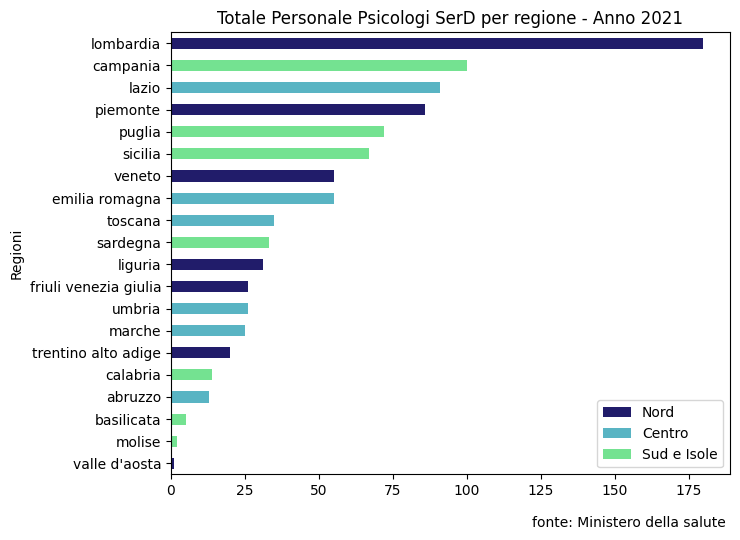

In [43]:
gdf_job_barplot = gdf_job.sort_values(by=['tot_personal']).plot.barh(
    y="tot_personal",
    x="reg_name",
    ylabel='Regioni',
    title=plot_title,
    color=gdf_job.sort_values(by=['tot_personal'])['zone'].replace(REGION_COLOURS)
).legend(
    [
        Patch(facecolor=REGION_COLOURS['Nord']),
        Patch(facecolor=REGION_COLOURS['Centro']),
        Patch(facecolor=REGION_COLOURS['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [44]:
gdf_job_barplot.get_figure().savefig('output/gdf_job_barplot.png')

In [45]:
plot_title = "Totale personale {} SerD per regione - Anno {}".format(
    JOB_TEXT,
    YEAR
)

Text(260, -30, 'fonte: Ministero della salute')

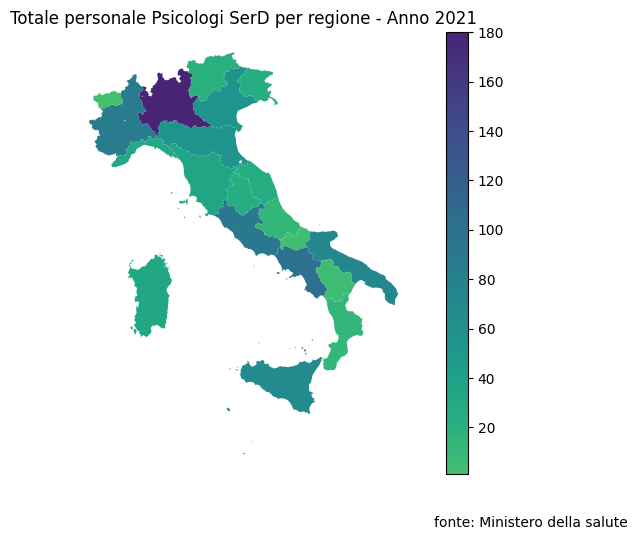

In [46]:
plot_job = gdf_job.plot(
    column="tot_personal",
    legend=True,
    cmap=CMAP
);
plt.title(plot_title)
plot_job.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [47]:
plot_job.get_figure().savefig('output/plot_job.png')

In [48]:
plot_title = "Media personale {} per SerD per regione - Anno {}".format(
    JOB_TEXT,
    YEAR
)

Text(260, -30, 'fonte: Ministero della salute')

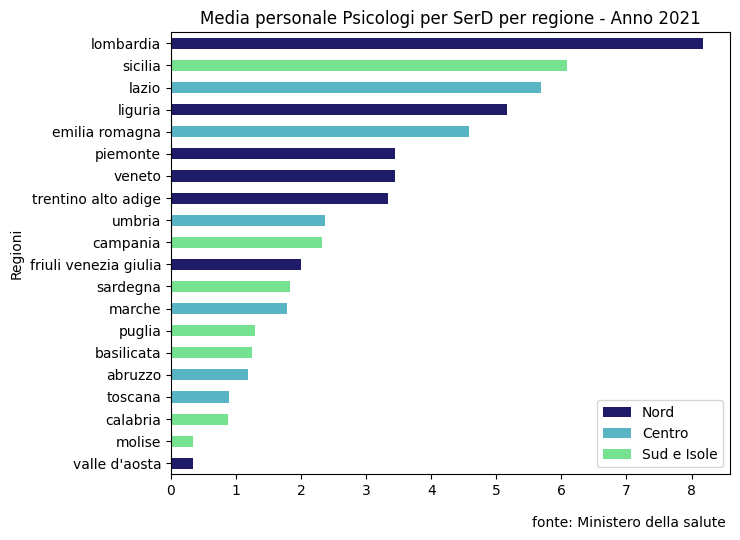

In [49]:
gdf_job_barplot_avg = gdf_job.sort_values(by=['personal_avg']).plot.barh(
    y="personal_avg",
    x="reg_name",
    ylabel='Regioni',
    title=plot_title,
    color=gdf_job.sort_values(by=['personal_avg'])['zone'].replace(REGION_COLOURS)
).legend(
    [
        Patch(facecolor=REGION_COLOURS['Nord']),
        Patch(facecolor=REGION_COLOURS['Centro']),
        Patch(facecolor=REGION_COLOURS['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [50]:
gdf_job_barplot_avg.get_figure().savefig('output/gdf_job_barplot_avg.png')

Text(260, -30, 'fonte: Ministero della salute')

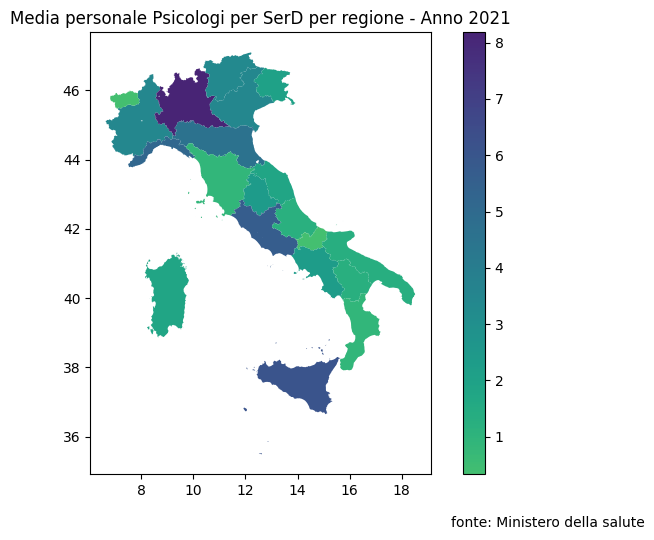

In [51]:
plot_job_avg = gdf_job.plot(
    column="personal_avg",
    legend=True,
    cmap=CMAP
);
plt.title(plot_title)
plot_job.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [52]:
plot_job_avg.get_figure().savefig('output/plot_job_avg.png')

Text(260, -30, 'fonte: Ministero della salute')

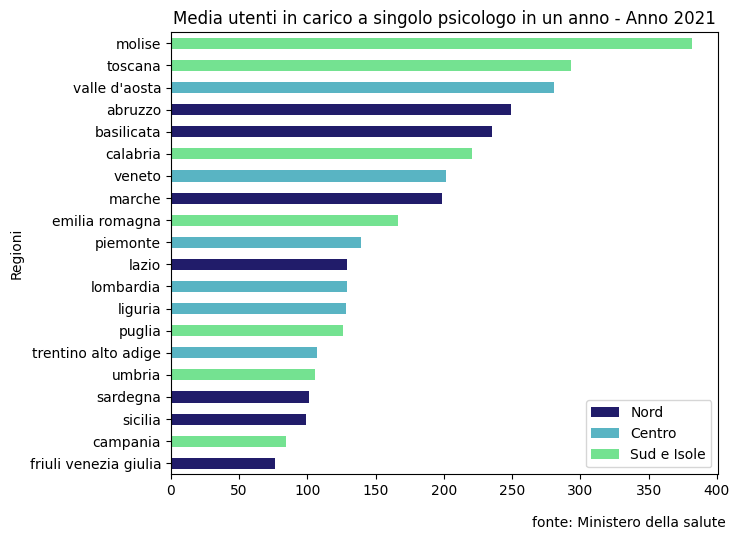

In [53]:
gdf_personal_users_barplot = gdf_job.sort_values(by=['personal_per_user']).plot.barh(
    y="personal_per_user",
    x="reg_name",
    ylabel='Regioni',
    title="Media utenti in carico a singolo psicologo in un anno - Anno 2021",
    color=gdf_job.sort_values(by=['serd_count'])['zone'].replace(REGION_COLOURS)
).legend(
    [
        Patch(facecolor=REGION_COLOURS['Nord']),
        Patch(facecolor=REGION_COLOURS['Centro']),
        Patch(facecolor=REGION_COLOURS['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [54]:
gdf_personal_users_barplot.get_figure().savefig('output/gdf_personal_users_barplot.png')

Text(260, -30, 'fonte: Ministero della salute')

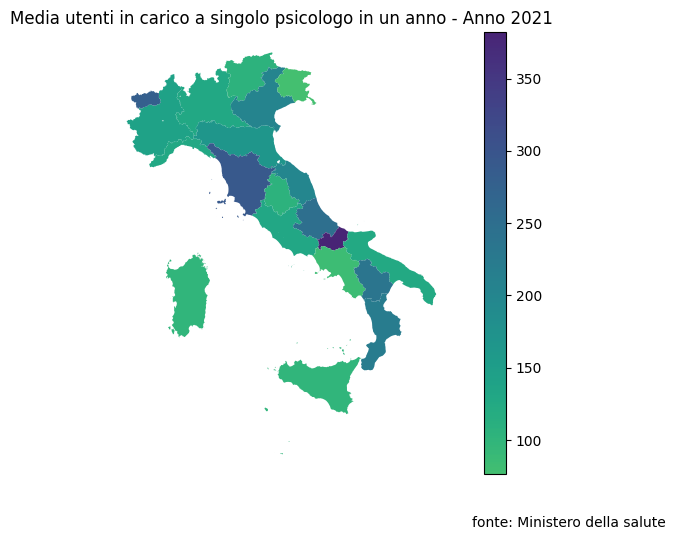

In [55]:
plot_personal_users = gdf_job.plot(
    column="personal_per_user",
    legend=True,
    cmap=CMAP
)
plt.title("Media utenti in carico a singolo psicologo in un anno - Anno 2021")
plot_personal_users.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [56]:
plot_personal_users.get_figure().savefig('output/plot_personal_users.png')